In [1]:
#Useful links
#https://gribblelab.org/compneuro2012/2_Modelling_Dynamical_Systems.html
#http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html
#https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/

In [41]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

def g(inpt):
    inpt[inpt<=0.4]=0.2
    inpt[np.logical_and(inpt>0.4,inpt<0.8)]=2*inpt-0.6
    inpt[inpt>=0.8]=1
    '''
    if inpt<=0.4:
        return 0.2
    elif inpt>0.4 and inpt<0.8:
        return 2*inpt-0.6
    elif inpt>=0.8:
        return 1
        
    '''
    return inpt

    
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ -X[0,:]+3*X[1,:]*g(X[0,:]), (2.8-X[1.:]-9*X[1,:]*g(X[0,:]))/20])
# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 20,  1000)
# initial values: x0 = 10, y0 = 2
Sys0 = np.array([0.5, 2])
#X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)

(1000, 2)


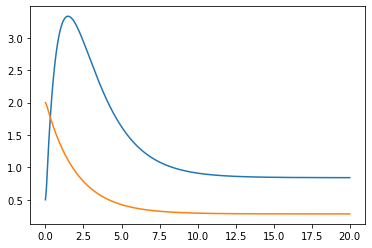

In [22]:
print(X.shape)
plt.plot(t,X[:,0])
plt.plot(t,X[:,1])

In [39]:
# brute force: iterate through possibility space (r)

# define system in terms of separated differential equations
def dhdt(h,x):
    return -h+3*x*g(h)
def dxdt(h,x):
    return (2.8-x-9*x*g(h))/20

fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((dhdt(x,y) == 0) and (dxdt(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(100)

TypeError: 'int' object does not support item assignment

(20, 20) (20, 20)
[[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
  0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
  1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
  1.89473684 2.        ]
 [0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
  0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
  1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
  1.89473684 2.        ]
 [0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
  0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
  1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
  1.89473684 2.        ]
 [0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
  0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
  1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
  1.89473684 2.        ]
 [0.         0.10526316 0.21052632 0.31578947 0.42105263 0.5263157

TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

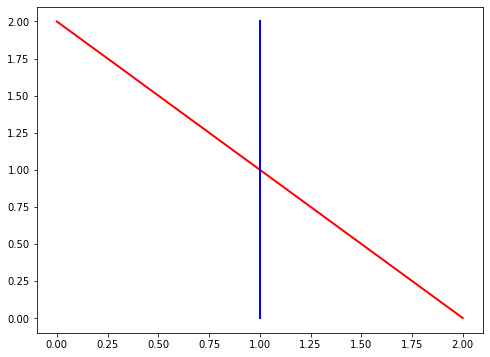

In [43]:
#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,2,20)
y = np.arange(0,2,20)

# plot nullclines
ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline')
ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

'''
# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')
'''
# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)

X1 , Y1  = np.meshgrid(x, y) # create a grid
print(X1.shape,Y1.shape)
print(X1)
DX1, DY1 = [dxdt(X1,Y1), dydt(X1,Y1)]                       # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()